# DBSCAN 기본 코드

Density-based spatial clustering of Application Noise (밀도 기반 데이터 클러스터링 알고리즘)

클러스터의 개수를 미리 지정할 필요가 없다.

복잡한 형상의 데이터 셋에도 무리 없이 적용 가능

어떤 클래스에도 속하지 않는 포인트를 구분할 수 있다.

속도는 다소 느리다.

> scaling의 영향을 크게 받으며, standard_scaling이 필수

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

### [2] 데이터 가져오기 - 게임 유저 군집화

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/game_usage.xlsx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   time spent  100 non-null    int64
 1   game level  100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB
None

데이터프레임 상위 5개 행
+----+--------------+--------------+
|    |   time spent |   game level |
|----+--------------+--------------|
|  0 |           39 |          944 |
|  1 |           55 |          705 |
|  2 |           29 |          757 |
|  3 |           59 |          999 |
|  4 |            7 |          109 |
+----+--------------+--------------+

데이터프레임 하위 5개 행
+----+--------------+--------------+
|    |   time spent |   game level |
|----+--------------+--------------|
| 95 |           47 |          939 |
| 96 |           50 |          485 |
| 97 |           13 |          916 |
| 98 |           79 |          235 |
| 99 |           48 |          338 |
+----+--------------+--------------+


## #02. 데이터 전처리

> DBSCAN은 성능이 데이터 스케일링에 매우 의존적이기 때문에 필수적으로 스케일링을 수행해야 한다.

### [1] 데이터 표준화

In [3]:
df = my_standard_scaler(origin)
df

,time spent,game level
0,-0.250733,1.474805
1,0.326494,0.606546
2,-0.611500,0.795456
3,0.470801,1.674613
4,-1.405187,-1.558652
...,...,...
95,0.037881,1.456640
96,0.146111,-0.192688
97,-1.188727,1.373084
98,1.192335,-1.100909


## #03. 군집화 모델 

### [1] 하이퍼파라미터 설정

| 하이퍼파라미터 | 설명 | 기본값 | 추천 | 가능한 값 |
|----------------|--------------------------------|--------|-----------------------------------------------------------|---------------------------|
| `eps`          | 최대 이웃 거리.                | `0.5`  | 밀도와 분포에 맞게 조정. **KNN 거리 그래프 사용 권장**.      | 양의 실수                 |
| `min_samples`  | `eps` 내 최소 이웃 수. 일반적으로 `minPts`라고 함 | `5`    | 밀도 기준에 맞게 조정. 특성 수보다 크게 설정 권장.        | 양의 정수                 |
| `metric`       | 거리 측정 방법.               | `'euclidean'` | 데이터 특성에 맞는 거리 측정 방식 선택.             | 'cityblock', 'euclidean', 등 |
| `algorithm`    | 이웃 검색 알고리즘.           | `'auto'` | 데이터 크기/차원에 따라 `'kd_tree'`, `'ball_tree'`, 선택 권장. | 'auto', 'kd_tree', 등     |
| `leaf_size`    | `'kd_tree'`나 `'ball_tree'`의 리프 크기. | `30`   | 검색 시간과 메모리 사용에 영향. 값 조정으로 성능 최적화 가능. | 양의 정수                 |

In [10]:
# 모델 객체 생성
estimator = DBSCAN(eps=0.3, min_samples=5, metric='euclidean', algorithm='kd_tree', leaf_size=30, n_jobs=-1)

# 모델 학습
estimator.fit(df)

# 예측 -> predict() 메서드가 없음
cluster = estimator.labels_
cluster

array([-1,  4, -1, -1, -1, -1, -1,  3,  2,  3, -1, -1,  0, -1, -1,  0, -1,
        0,  1, -1, -1, -1,  5, -1,  0,  1, -1,  0,  2, -1, -1, -1,  2,  0,
       -1, -1,  3,  2, -1,  1,  2, -1,  1, -1, -1,  4, -1,  3,  4, -1,  2,
        5, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4, -1,  3, -1,  4,  3, -1,
        3, -1,  1, -1, -1,  2, -1,  5, -1,  4,  0, -1, -1, -1,  3,  1, -1,
       -1,  1,  3,  0,  5,  4, -1,  2, -1, -1, -1, -1,  1,  5,  2],
      dtype=int64)

### [2] 결과를 포함하는 데이터프레임 생성

In [11]:
df2 = df.copy()
df2['cluster'] = cluster
df2

,time spent,game level,cluster
0,-0.250733,1.474805,-1
1,0.326494,0.606546,4
2,-0.611500,0.795456,-1
3,0.470801,1.674613,-1
4,-1.405187,-1.558652,-1
...,...,...,...
95,0.037881,1.456640,-1
96,0.146111,-0.192688,-1
97,-1.188727,1.373084,1
98,1.192335,-1.100909,5


### [3] 결과 시각화

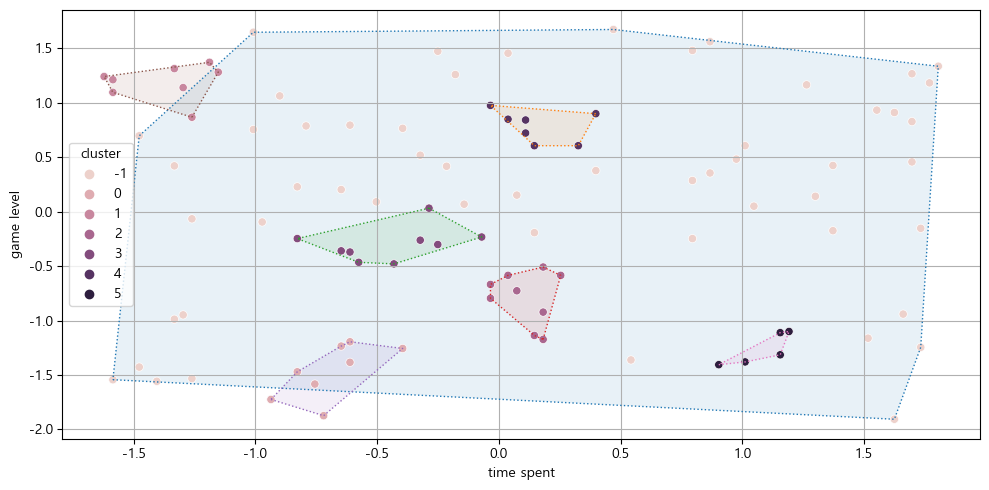

In [12]:
my_convex_hull(df2, xname='time spent', yname='game level', hue='cluster')

> 분류 결과가 좀 이상하다...?

## #04. sorted-k-dist 그래프 (KNN 거리 그래프)

- 클러스터링에 앞서 적절한 eps (epsilon) 값을 선택하는 데 중요한 역할을 하는 그래프
- `eps`는 클러스터를 형성하는 데 사용되는 밀도 기준으로, 특정 점에서 이 거리 이내에 있는 이웃 점들이 같은 클러스터로 묶이게 된다.
- KNN 거리 그래프는 각 데이터 포인트에 대해 K번째 가장 가까운 이웃까지의 거리를 플로팅하여, eps의 적절한 값을 추정하는 데 도움을 준다.

### 의미

1. 모든 데이터 포인트에 대한 K번째 가장 가까운 이웃까지의 거리를 Y축에 플로팅
2. 데이터 포인트를 X축에 정렬

데이터 세트 내의 밀도 변화를 시각화하여, 데이터 포인트들이 얼마나 밀집해 있는지를 보여준다. 이를 통해 데이터의 밀도 기반 클러스터링을 위한 eps 값을 선택할 수 있다.

### 해석 방법

#### 그래프의 형태 확인

KNN 거리 그래프를 그리면 대개 급격히 상승하는 "엘보" 혹은 무릎처럼 보이는 지점이 나타난다. 

이 지점은 저밀도 지역(즉, 클러스터 외부 또는 잡음)으로의 전환을 나타내며, 이 지점의 거리 값을 eps로 선택할 수 있다.

#### 감도 분석

때때로 한 가지의 K값만 고려하기보다는 여러 K값에 대해 그래프를 그려보고 eps의 선택이 클러스터링 결과에 어떻게 영향을 미치는지 관찰하는 것이 좋다. 

이를 통해 더 안정적이고 의미 있는 클러스터링 결과를 얻을 수 있다.

#### `NearestNeighbors(n_neighbors=k)`

* `NearestNeighbors`의 n_neighbors 파라미터 : 가까운 이웃의 수(기본값=5)
* `DBSCAN`의 MinPts : 핵심 포인트가 되기 위한 이웃의 수(기본값=5)

```python
n_neighbors == MinPts
```

### [1] k개의 최근접 이웃 만들기

In [ ]:
k = 5

neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df)

# 한 점의 최근접 이웃 찾기
distance, indices = neighbors_fit.kneighbors(df)

In [ ]:
distance


In [ ]:
indices

#### 가까운 순서대로 정렬

In [ ]:
s_distance = np.sort(distance, axis=0)
s_distance

#### 각 데이터 포인트로부터의 거리

이 리스트 하나하나가 각각의 데이터 포인트를 의미

In [ ]:
target = s_distance[:, 1]
target

#### 시각화 확인

x축에 데이터 포인트를 나열

In [ ]:
my_lineplot(df=None, xname=range(0, len(target)), yname=target)

> 시각화 결과 eps값을 0.4로 설정하여 군집 결과를 비교

### [2] 결과를 기반으로 군집화 수행

`eps`는 시각화 결과를 통해 `0.4`로 추정

`minPts`는 `k`값과 동일하므로 5로 설정

In [ ]:
estimator = DBSCAN(eps=0.4, min_samples=5, n_jobs=-1)
estimator.fit(df)

df2 = df.copy()
df2['cluster'] = estimator.labels_
my_convex_hull(df2, xname='time spent', yname='game level', hue='cluster')

### [3] `k`를 3으로 설정하여 재시도

#### (1) knn 거리 그래프

In [ ]:
k = 3

neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df)
distance, indices = neighbors_fit.kneighbors(df)

s_distance = np.sort(distance, axis=0)
target = s_distance[:, 1]
my_lineplot(df=None, xname=range(0, len(target)), yname=target)

#### (2) 군집화

군집의 결과로 설정된 `label`값이 `-1`인 경우는 속한 집단이 없다고 해석해야 함.

해당 데이터포인트가 잡음(Noise)로 분류되었음을 의미함.

DBSCAN은 밀도 기반 클러스터링 알고리즘으로, 데이터 포인트들 사이의 밀집도를 기준으로 클러스터를 형성하는데 이 과정에서 일정 밀도 이상의 데이터 포인트들은 클러스터에 포함되지만, 그 기준을 만족하지 못하는 데이터 포인트들은 잡음으로 분류된다.

잡음으로 분류된 노이즈 데이터는 이상치로 해석할 수 있다. 이를 해결하기 위해 (1) 이상치 정제후 다시 수행하거나 (2) `eps`와 `minPts`파라미터를 조정하여 클러스터링 결과를 개선 해야 한다.

In [ ]:
estimator = DBSCAN(eps=0.4, min_samples=k, n_jobs=-1)
estimator.fit(df)

df2 = df.copy()
df2['cluster'] = estimator.labels_
my_convex_hull(df2, xname='time spent', yname='game level', hue='cluster')

> 이와 같이 k값을 변경해 가면서 eps지점을 확인하고 이를 DBSCAN에 반영하여 최적의 군집 형태를 찾아야 한다.